# Exercise 18: Principal component methods

This homework assignment is designed to give you an intuition on principal component approaches to understanding high dimensional statistical relationships.

Like earlier homework, you will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository.

This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework/hcp_data* folder in the class GitHub repository.

1. Loading data 1/1
2. Correlational structure 4/4
3. Principal Component analysis 3/3
4. Associating with Flanker task performance 4/4
5. Reflection 2/2

---
## 1. Loading data (1 point)

We are going to look for low dimensional relationships between brain volume measures and working memory capacity.

First, we will need to load the `pls`, `tidyverse`, and `ggplot2` libraries for this assignment.


In [ ]:
install.packages("pls")

library(pls)
library(ggplot2)
library(tidyverse)




The downloaded binary packages are in
	/var/folders/zy/7fkr_dls50x53mn7v230d3k00000gp/T//RtmputATjr/downloaded_packages



Attaching package: 'pls'


The following object is masked from 'package:stats':

    loadings


-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v lubridate 1.9.3     v tibble    3.2.1
v purrr     1.0.4     v tidyr     1.3.1
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Use `read.csv` function to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file in the **hcp_data** folder.

(a) Using the tidyverse tools, make a new dataframe `d1` that only includes the Flanker Task performance (`Flanker_Unadj`) and *all* freesurfer **volume** measures for the right and left hemispheres together. Remove both "na's" and any columns that consist of only zeros.

Hint: Look up using the `ends_with` function to only select variables that end with "_Vol"

Use the `head` function to look at the first few rows of each data frame.

In [ ]:
# load data
data <- read.csv("/Users/katie/Documents/workspace/Data-Science-for-Psychology-and-Neuro/Homework-datasets/hcp_data/unrestricted_trimmed_1_7_2020_10_50_44.csv")

# make a new data frame with only Flanker Task data and all freesurfer volume measures using ends_with
d1 <- data %>% select("Flanker_Unadj", ends_with("_Vol")) %>%
    # remove rows with missing values
  na.omit() %>%
  # remove columns that consist of only zeros
  select_if(~!all(. == 0))

head(d1)



,Flanker_Unadj,FS_IntraCranial_Vol,FS_BrainSeg_Vol,FS_LCort_GM_Vol,FS_RCort_GM_Vol,FS_TotCort_GM_Vol,FS_SubCort_GM_Vol,FS_Total_GM_Vol,FS_SupraTentorial_Vol,FS_L_WM_Vol,...,FS_R_Vessel_Vol,FS_R_ChoroidPlexus_Vol,FS_5thVent_Vol,FS_WM_Hypointens_Vol,FS_OpticChiasm_Vol,FS_CC_Posterior_Vol,FS_CC_MidPosterior_Vol,FS_CC_Central_Vol,FS_CC_MidAnterior_Vol,FS_CC_Anterior_Vol
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2,130.42,1864518,1406924,304488,305634,610122,70240,807245,1239692,269963,...,80,1613,0,1269,325,800,409,569,522,813
3,112.56,1512540,1109710,240030,243207,483238,56623,664124,957615,203472,...,70,1007,0,1155,195,1029,526,578,576,649
4,121.18,1684117,1280171,260695,265243,525938,63869,726206,1106881,247504,...,88,1303,0,1279,302,972,589,528,471,858
5,126.53,1816044,1321362,276506,278002,554508,74869,762308,1155067,254742,...,81,909,0,1154,296,1065,618,838,729,1072
6,101.85,1437868,1053766,203718,210539,414257,58813,579632,916973,213012,...,75,1215,3,377,235,1057,591,538,430,849
7,107.04,1512727,1126655,242489,248807,491296,62092,665024,984952,205342,...,93,1331,17,554,258,1033,494,487,489,992


---
## 2. Correlational structure (4 points)

(a) Take a look at the correlation between all of the freesurfer volume measures ("FS_") using the `cor` function. Create a new variable called `fs_cor` that is the correlation matrix for only the freesurfer volumes

In [ ]:
# create a new variable called fs_cor that is the correlation matrix for ony the freesurfer volume measures
fs_cor <- cor(select(d1, starts_with("FS_")), use = "pairwise.complete.obs")

# view first 6 rows and columns of the correlation matrix
fs_cor[1:6, 1:6]

,FS_IntraCranial_Vol,FS_BrainSeg_Vol,FS_LCort_GM_Vol,FS_RCort_GM_Vol,FS_TotCort_GM_Vol,FS_SubCort_GM_Vol
FS_IntraCranial_Vol,1.0000000,0.8977578,0.8400174,0.8439151,0.8452780,0.7885140
FS_BrainSeg_Vol,0.8977578,1.0000000,0.9448159,0.9482717,0.9502618,0.8689939
FS_LCort_GM_Vol,0.8400174,0.9448159,1.0000000,0.9844592,0.9960196,0.7897863
FS_RCort_GM_Vol,0.8439151,0.9482717,0.9844592,1.0000000,0.9961939,0.7925724
FS_TotCort_GM_Vol,0.8452780,0.9502618,0.9960196,0.9961939,1.0000000,0.7942866
FS_SubCort_GM_Vol,0.7885140,0.8689939,0.7897863,0.7925724,0.7942866,1.0000000


(b) Load (and install locally if needed) the `reshape2` library in order to use the `melt` function on the new `fs_cor` object. Use `head` to show the new, melted `fs_cor` object.

In [ ]:
# load and install the reshape2 package
install.packages("reshape2")
library(reshape2)

# use melt function to convert the correlation matrix to a data frame
fs_cor_melt <- melt(fs_cor)

# view the first 6 rows of the melted correlation matrix
head(fs_cor_melt)

also installing the dependency 'plyr'





The downloaded binary packages are in
	/var/folders/zy/7fkr_dls50x53mn7v230d3k00000gp/T//RtmputATjr/downloaded_packages



Attaching package: 'reshape2'


The following object is masked from 'package:tidyr':

    smiths




,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,FS_IntraCranial_Vol,FS_IntraCranial_Vol,1.0000000
2,FS_BrainSeg_Vol,FS_IntraCranial_Vol,0.8977578
3,FS_LCort_GM_Vol,FS_IntraCranial_Vol,0.8400174
4,FS_RCort_GM_Vol,FS_IntraCranial_Vol,0.8439151
5,FS_TotCort_GM_Vol,FS_IntraCranial_Vol,0.8452780
6,FS_SubCort_GM_Vol,FS_IntraCranial_Vol,0.7885140


Plot the correlation as a heatmap using `ggplot2`.

Hint: use the `scale_fill_gradient2` function to scale the colors between red and blue, capping the values at -1 and +1.

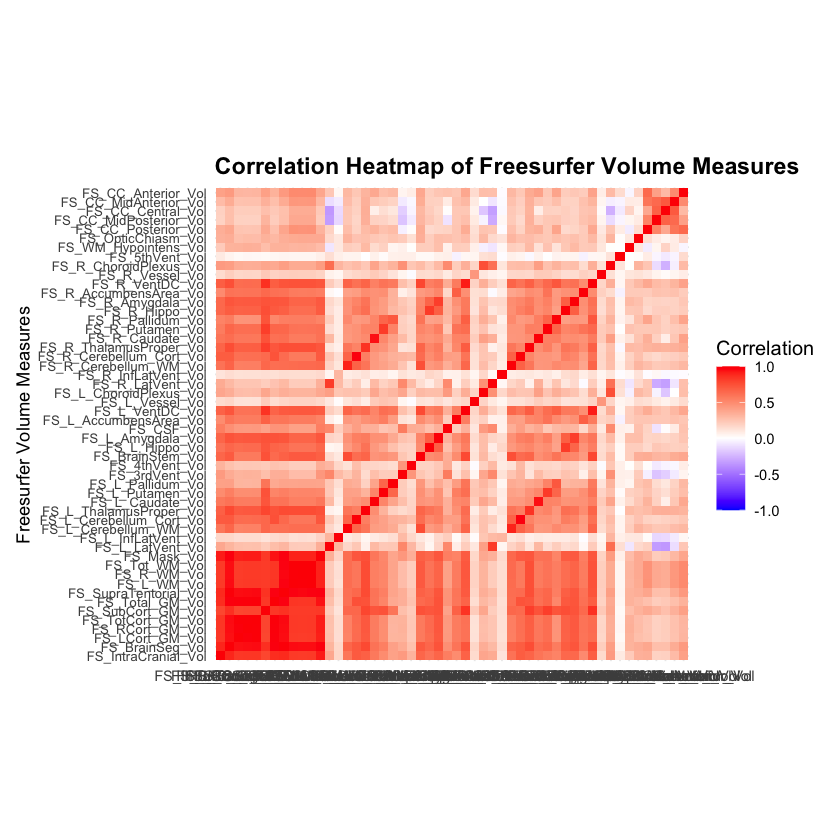

In [ ]:
# plot the correlation as a heatmap using ggplot2
ggplot(data = fs_cor_melt, aes(x = Var1, y = Var2, fill = value)) +
    geom_tile() +
    scale_fill_gradient2(
        low = "blue",
        mid = "white",
        high = "red",
        midpoint = 0,
        limit = c(-1, 1),
        space = "Lab",
        name = "Correlation") +
    theme_minimal() +
    theme(
        axis.text.y = element_text(size = 8),
        plot.title = element_text(size = 14, face = "bold"),
        legend.title = element_text(size = 12),
        plot.margin = unit(c(10, 10, 10, 10), "pt")  # add margin to the plot
    ) +
    labs(
        title = "Correlation Heatmap of Freesurfer Volume Measures",
        x = NULL,
        y = "Freesurfer Volume Measures") +
    theme(aspect.ratio = 1)  # make the plot square


What patterns do you see in the correlations?

> *There is considerable correlation, with bands that denote large swaths. The lower left is higher level of correlation and the least amount of correleation is on the top and right edges.*
> *


---
## 3. Principal component analysis (3 points)

Let's see how many principal components explain at *at least* 95% of the data.

(a) Create a new object called `fs_d.pca` using the `princomp` function (do not forget to scale the data).


In [ ]:
# create a new object called fs_d.pca that is the PCA of the freesurfer volume measures
fs_d.pca <- prcomp(select(d1, starts_with("FS_")), center = TRUE, scale. = TRUE)


(b) Calculate the cumulative variance explained (not unique variance explained as in the tutorial) across the principal components and plot the results using `ggplot`.

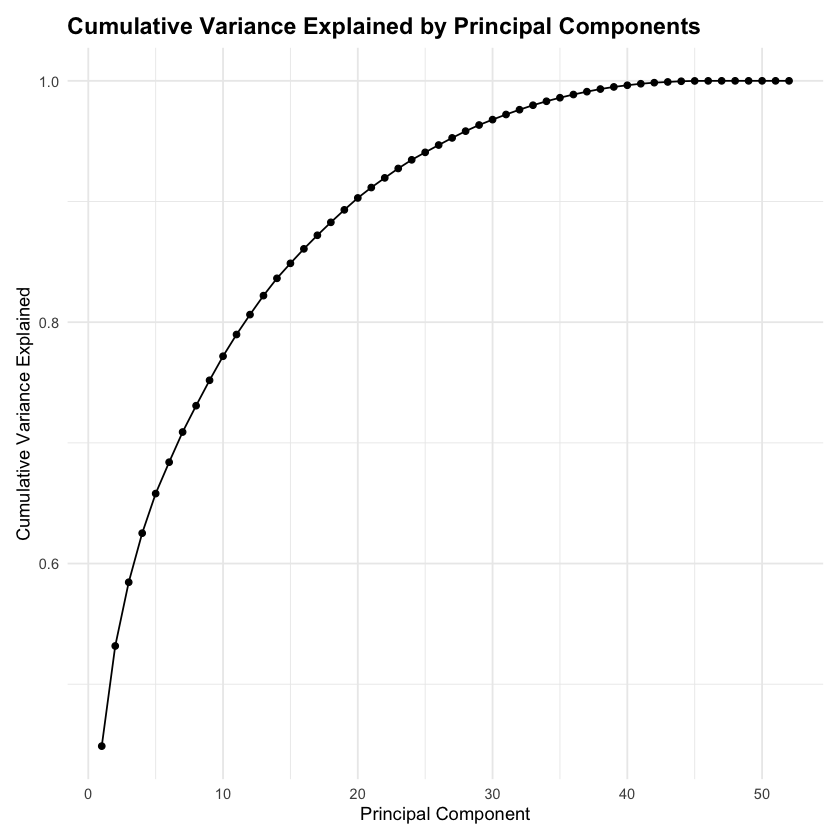

In [ ]:
# calculate the cumulative variance explained by each principal component
cumulative_variance <- cumsum(fs_d.pca$sdev^2) / sum(fs_d.pca$sdev^2)

# plot the cumulative variance explained by each principal component
ggplot(data = data.frame(PC = 1:length(cumulative_variance), CumulativeVariance = cumulative_variance), aes(x = PC, y = CumulativeVariance)) +
    geom_line() +
    geom_point() +
    labs(
        title = "Cumulative Variance Explained by Principal Components",
        x = "Principal Component",
        y = "Cumulative Variance Explained") +
    theme_minimal() +
    theme(
        plot.title = element_text(size = 14, face = "bold"),
        legend.title = element_text(size = 12),
        plot.margin = unit(c(10, 10, 10, 10), "pt")  # add margin to the plot
    )


(c) Determine exactly how many principal components explain at least 95% of the variance.

Hint: Look up the `which` function.

In [ ]:
# Determine exactly how many principal components explain 95% of the variance
num_components_95 <- which(cumulative_variance >= 0.95)[1]
num_components_95


[1] 27

What does this tell you about the underlying dimensionality of the brain volume measures?

> *If 27 principal components explain at least 95% of the variance, there is a core operating unit that's critical and incredibly complex in executing these functions.*
> *


---
## 4. Associating with Flanker task peformance (4 points)

Now apply PCR to the `d1` object you created at the beginning (which includes the Flanker task scores) to find how freesurfer volumes predict Flanker task performance. Set the random seed to "2". Use cross-validation as the validation type and don't forget to scale your data. Show the `summary` of the model fit.

Hint: If you receive an error applying the "scale=TRUE" flag, then you likely still have columns of all zeros somewhere in your data table.

In [ ]:
# set random seed for reproducibility
set.seed(2)

# apply pcr to the d1 data object with cross-validation and scale the data
pcr_model <- pcr(Flanker_Unadj ~ ., data = d1, validation = "CV", scale = TRUE)

# show the summary of the model
summary(pcr_model)

Data: 	X dimension: 1113 52 
	Y dimension: 1113 1
Fit method: svdpc
Number of components considered: 52

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           10.08    9.925    9.924    9.933    9.922    9.924    9.912
adjCV        10.08    9.924    9.923    9.932    9.920    9.922    9.910
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       9.889    9.891    9.893     9.896     9.909     9.918     9.934
adjCV    9.886    9.887    9.890     9.892     9.904     9.913     9.927
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps  20 comps
CV        9.941     9.945     9.934     9.899     9.896     9.907     9.914
adjCV     9.934     9.939     9.928     9.889     9.886     9.897     9.903
       21 comps  22 comps  23 comps  24 comps  25 comps  26 comps  27 comps
CV        9.922     9.930     9.939     9.955     9.968     9.971     9.979
adjCV     9.911  

(b) Use the `validationplot` function to evaluate the bias-variance tradeoff using the cross-validated mean squared-error for each component.

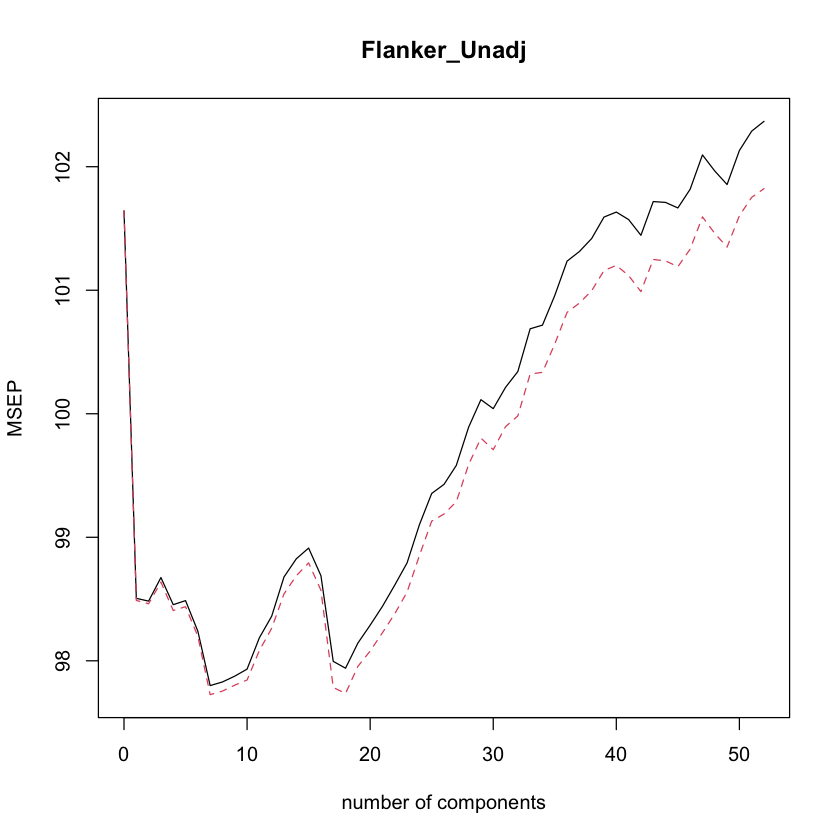

In [ ]:
# use the validationplot function to evaluate the bias-variance tradeoff using cross-validation mean squared error
validationplot(pcr_model, val.type = "MSEP")


(c) Extract the MSEP values of the cross validated fit ("CV" not "adj_CV") from the model object using the `MSEP` funtion. Create a new array of these values. Use the `drop` function to remove the singleton dimension (the original array is 2x1x53 and we want a 2x53 object). Find the minimum value of the first row (the "CV").

[1] 97.79933

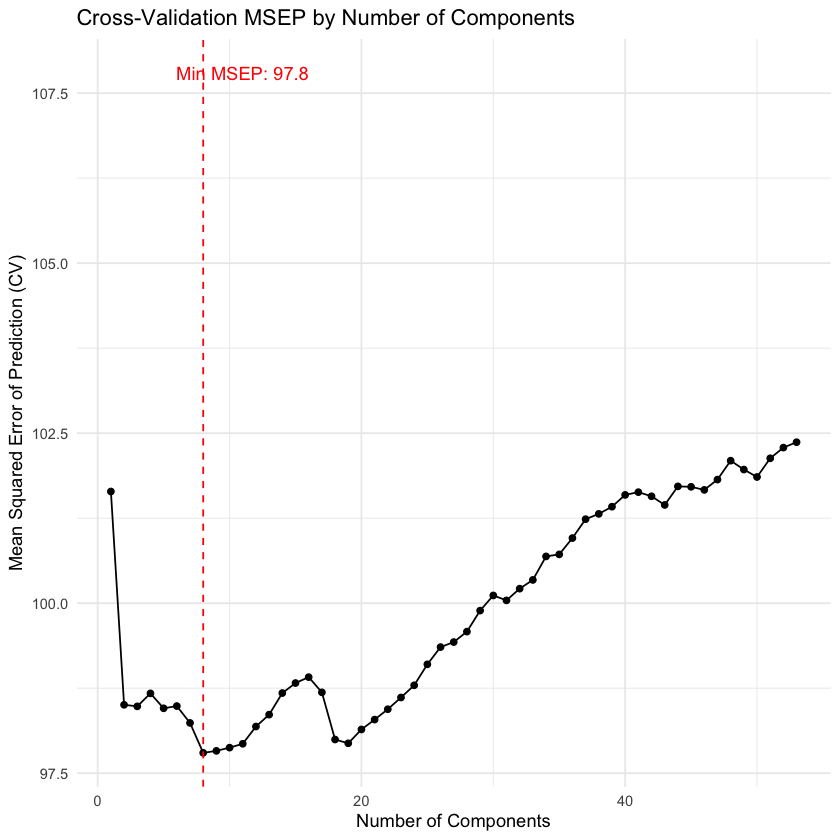

In [ ]:
# extract the MSEP values of the cross validated fit ("CV" not "adj_CV")
msep_values <- MSEP(pcr_model)

# use drop fx to remove the singleton dimension to get a 2x53 object
msep_values_2 <- drop(msep_values$val)

# find the mimimum value in the first row (CV)
min_msep <- min(msep_values_2[1, ])

# print the minimum CV value
min_msep

# Plot the MSEP values for cross-validation
ggplot(data = data.frame(
  Components = 1:ncol(msep_values_2),
  MSEP_CV = msep_values_2[1, ]
)) +
  geom_line(aes(x = Components, y = MSEP_CV)) +
  geom_point(aes(x = Components, y = MSEP_CV)) +
  geom_vline(
    xintercept = which.min(msep_values_2[1, ]),
    linetype = "dashed",
    color = "red") +
  annotate("text", x = which.min(msep_values_2[1, ]) + 3, y = min_msep + 10,
           label = paste("Min MSEP:", round(min_msep, 2)), color = "red") +
  labs(
    title = "Cross-Validation MSEP by Number of Components",
    x = "Number of Components",
    y = "Mean Squared Error of Prediction (CV)"
  ) +
  theme_minimal()


What what does this plot tell you about how many components best explain variance in Flanker task performance?

> *As components are added beyond 20, the MSEP goes steadily up. Its lowest level of 97.8 is at approximately 9 components with another similar low just before 20 components.*
> *

---
## 5. Reflection (2 points)

Compare the number of components that explain variance in X alone (the brain volumes) to the number of components that explain performance in the Flanker task. What does the difference in these two numbers tell you about how variation in brain volumes relates to task performance?

> *The original PCA comparison showed 27 components are responsible for 95% of the variance but this last analysis shows approximately 9 and 20 components have the lowest MSEP in the Flanker task. I think the difference gives us insight as to the level of complexity regarding each of these inquiries. The brain volume variance is far more complex across the regions of the brain; and, assuming 9 and 20 components are good estimates and roughly equivalent to each other in this analysis, estimating Flanker task performance needs far fewer regions to get to a solid number.*

>

**DUE:** 5pm EST, April 15, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *as usually, worked with my coding tutor, claude.ai*